In [1]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import PIL.Image as Image

from skimage import io, color, transform
from skimage.feature import hog

import time

# Preparación del dataset

In [3]:
base = "../FER2013/"
paths = []
labels = []

for level_1_dir in os.listdir(base):
    level_1_path = os.path.join(base, level_1_dir)
    if os.path.isdir(level_1_path):
        for level_2_dir in os.listdir(level_1_path):
            level_2_path = os.path.join(level_1_path, level_2_dir)
            if os.path.isdir(level_2_path):
                for file in os.listdir(level_2_path):
                    file_path = os.path.join(level_2_path, file)
                    if os.path.isfile(file_path):
                        paths.append(file_path)
                        labels.append(level_2_dir)

df = pd.DataFrame({'path': paths, 'label': labels})

def load_and_preprocess_image(path):
    image_color = cv2.imread(path)
    gray_image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    return gray_image

df['gray_matrix'] = df['path'].apply(load_and_preprocess_image)


In [4]:
images=df['gray_matrix'].to_numpy()

In [5]:
np.save('..\DatosDF\labels.npy', labels)
np.save('..\DatosDF\images.npy', images)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\gonza\AppData\Local\Temp\ipykernel_23228\1998068355.py:1: SyntaxWarning: invalid escape sequence '\D'
  np.save('..\DatosDF\labels.npy', labels)
C:\Users\gonza\AppData\Local\Temp\ipykernel_23228\1998068355.py:2: SyntaxWarning: invalid escape sequence '\D'
  np.save('..\DatosDF\images.npy', images)


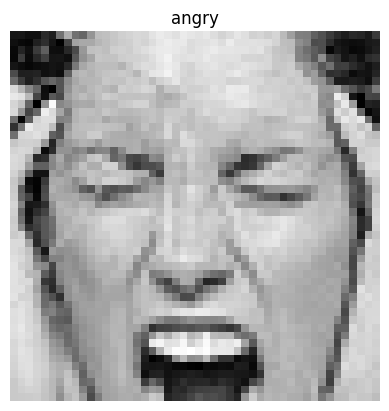

In [6]:
a=69
plt.imshow(images[a], cmap='gray')
plt.axis('off')  # Desactiva los ejes
plt.title(labels[a])
plt.show()

In [7]:
def calculate_hog(image):
    # Reshape de la imagen al tamaño requerido por HOG
    image_resized = cv2.resize(image, (64, 128))

    # Crear un objeto HOG
    hog = cv2.HOGDescriptor()

    # Calcular el HOG en la imagen redimensionada
    hog_features = hog.compute(image_resized)
    return hog_features

In [8]:
%%time

df['hog'] = df['gray_matrix'].apply(calculate_hog)
df

CPU times: total: 5.36 s
Wall time: 5.65 s


,path,label,gray_matrix,hog
0,../FER2013/test\angry\PrivateTest_10131363.jpg,angry,"[[46, 34, 26, 23, 12, 32, 35, 26, 26, 38, 71, ...","[0.33274356, 0.1704117, 0.025357863, 0.0006549..."
1,../FER2013/test\angry\PrivateTest_10304478.jpg,angry,"[[55, 33, 54, 32, 26, 21, 50, 29, 38, 45, 79, ...","[0.27381572, 0.22986299, 0.09233569, 0.0294371..."
2,../FER2013/test\angry\PrivateTest_1054527.jpg,angry,"[[123, 123, 126, 131, 124, 69, 109, 149, 159, ...","[0.34384748, 0.01883176, 0.004236705, 0.010840..."
3,../FER2013/test\angry\PrivateTest_10590091.jpg,angry,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[0.014489936, 0.008741817, 0.020611065, 0.0, 0..."
4,../FER2013/test\angry\PrivateTest_1109992.jpg,angry,"[[127, 121, 124, 137, 123, 118, 120, 111, 111,...","[0.25325525, 0.0767658, 0.026558537, 0.0181144..."
...,...,...,...,...
35882,../FER2013/train\surprise\Training_99916297.jpg,surprise,"[[27, 26, 26, 26, 27, 27, 28, 28, 33, 34, 35, ...","[0.14022486, 0.07403437, 0.0686184, 0.0, 0.041..."
35883,../FER2013/train\surprise\Training_99924420.jpg,surprise,"[[7, 6, 13, 39, 76, 58, 29, 21, 16, 20, 34, 56...","[0.39263126, 0.11640715, 0.0072888294, 0.00144..."
35884,../FER2013/train\surprise\Training_99937001.jpg,surprise,"[[124, 129, 125, 123, 129, 128, 127, 128, 131,...","[0.20560372, 0.04748373, 0.03934206, 0.0998374..."
35885,../FER2013/train\surprise\Training_99951755.jpg,surprise,"[[242, 242, 242, 216, 110, 42, 20, 41, 37, 14,...","[0.3589315, 0.16316827, 0.042510495, 0.0318309..."


In [13]:
from sklearn.decomposition import PCA

In [47]:
entrada=df['hog'].values.tolist()
# aplica transformacion PCA
pca = PCA(n_components=821) # define el transformador PCA con n_componentes
fit_pca = pca.fit(entrada)   # ajusta el transformador PCA con los datos estandarizados o Data sin oultilers
X_pca = fit_pca.transform(entrada) # obtiene los datos pca transformados (el resultado es un array numpy)

print("Componentes principales:")
print(fit_pca.components_) #Componentes principales

Componentes principales:
[[-0.0318534  -0.01040787  0.00943468 ...  0.00654086  0.00619359
  -0.00629608]
 [ 0.00222531 -0.00382971  0.0062989  ... -0.00354993 -0.0083415
  -0.0151551 ]
 [-0.00337737  0.02735024  0.01387822 ...  0.01227419  0.01618459
   0.00796845]
 ...
 [ 0.03983126  0.00740468  0.02671079 ...  0.0028345   0.00941615
   0.02085214]
 [ 0.03663153 -0.02308392 -0.00915476 ...  0.00941608  0.00029536
   0.00916205]
 [ 0.02866959 -0.00253248 -0.00240953 ... -0.02023169 -0.020077
  -0.02998024]]


In [48]:
print('explained_variance_ratio :.{}%'.format(fit_pca.explained_variance_ratio_[:].sum()*100))

explained_variance_ratio :.90.00024069252265%


In [59]:
df['pca']=X_pca.tolist()

In [61]:
pca=df['pca'].to_numpy()

In [63]:
np.save('../DatosDF/pca.npy', pca)